In [2]:
import os
import glob
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
base_dir = '/scratch/midway2/canliu'
GRAM_PATH = os.path.join(base_dir, 'grams')
CLASSES = ['urban', 'neutral', 'nature']
DIMS = {'conv1_1': 64 * 64,
       'pool1': 64 * 64,
       'pool2': 128 * 128,
       'pool3': 256 * 256,
       'pool4': 512 * 512}

In [4]:
def load_gram(gram_path = GRAM_PATH, layer = 'conv1_1', classes = CLASSES, cutoff = None):
    df = []
    idx = 0
    for cls in classes:
        grams = []
        print("class: {}".format(cls))
        files = sorted(glob.glob(os.path.join(gram_path, cls) + "/*"))
        if cutoff:
            files = files[:cutoff]
        for f in files:
            print(f)
            gram = np.load(f)
            for key in gram.keys():
                if key.endswith(layer):
                    layer_gram = gram[key].flatten()
                    grams.append(layer_gram)
        grams_df = pd.DataFrame(grams, index = list(range(idx, idx + len(grams))))
        grams_df['class'] = cls
        df.append(grams_df)
        idx += len(grams)
    return pd.concat(df)

In [15]:
# load data into Pandas DataFrame
layer = 'pool1'
grams_df = load_gram(layer = layer, cutoff = 20)

class: urban
/scratch/midway2/canliu/grams/urban/10277411975_40edcdf48f_k.npz
/scratch/midway2/canliu/grams/urban/14110340975_dc6671c58b_k.npz
/scratch/midway2/canliu/grams/urban/16153261485_4146b8bc89_k.npz
/scratch/midway2/canliu/grams/urban/2915825346_8ab54dee48_o.npz
/scratch/midway2/canliu/grams/urban/4377475363_d61b2ae460_o.npz
/scratch/midway2/canliu/grams/urban/4477947944_a4808e0f07_o.npz
/scratch/midway2/canliu/grams/urban/4911002033_d87276e515_o.npz
/scratch/midway2/canliu/grams/urban/4929607102_8870f09340_o.npz
/scratch/midway2/canliu/grams/urban/5069294588_01802c08fe_o.npz
/scratch/midway2/canliu/grams/urban/6067898115_cb4a811654_o.npz
/scratch/midway2/canliu/grams/urban/6098926490_049d06123b_o.npz
/scratch/midway2/canliu/grams/urban/8730161898_8ee167bc51_k.npz
/scratch/midway2/canliu/grams/urban/9232732578_68f25ea0fe_o.npz
/scratch/midway2/canliu/grams/urban/labelme_bakzysyhkgubmcq.npz
/scratch/midway2/canliu/grams/urban/labelme_bfwprzutuhkhfhr.npz
/scratch/midway2/canliu/

/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [16]:
# datafram
# 10 images from urban & 10 images from nature
grams_df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,class
0,498680.000000,220942.500000,240600.500000,177727.421875,426198.125000,296734.000000,181202.890625,201543.812500,200458.171875,140762.250000,...,236748.062500,187110.531250,219699.546875,359262.437500,235937.218750,83359.609375,18885.107422,361374.062500,351272.156250,urban
1,445149.312500,204139.093750,228166.781250,168631.500000,432150.281250,266872.000000,162873.343750,179809.328125,150874.703125,118217.453125,...,208955.437500,161105.750000,242075.375000,298498.781250,238364.000000,71709.226562,16814.152344,328817.343750,289806.437500,urban
2,348901.062500,147010.468750,149579.500000,125615.109375,291390.250000,191885.843750,124210.679688,135290.250000,132465.343750,139770.531250,...,176009.625000,142571.359375,169963.906250,261969.906250,169765.937500,61116.226562,13034.732422,256711.531250,244534.031250,urban
3,220095.984375,101060.382812,108290.539062,87973.039062,219709.296875,127480.273438,108118.265625,87669.757812,95728.781250,72045.203125,...,127902.015625,82091.101562,119557.921875,208115.406250,128929.171875,52164.835938,10268.285156,217677.187500,157967.781250,urban
4,173871.781250,69159.132812,57935.449219,79104.781250,146355.453125,92668.851562,62641.003906,74453.148438,71698.523438,69892.804688,...,85456.734375,79220.171875,121472.804688,100645.500000,100878.625000,43899.210938,9885.762695,124390.093750,136046.546875,urban
5,13356.640625,7275.542969,3615.006836,15497.188477,19864.753906,7819.351562,8092.521484,10330.262695,5240.411133,6272.449219,...,7585.018555,7467.061523,9524.233398,7713.086914,10885.085938,11067.541016,2071.814209,12279.791016,12504.706055,urban
6,19698.304688,9434.281250,808.495850,34008.828125,20171.099609,12127.878906,9221.404297,24768.958984,4221.764160,7713.280273,...,9343.420898,10179.142578,13409.593750,8000.513184,13036.977539,21659.507812,5040.719727,12567.093750,14899.202148,urban
7,17759.638672,8079.477539,224.900909,40016.750000,19390.042969,9522.789062,9137.540039,31940.000000,3271.742188,7916.421875,...,7364.472656,8414.946289,10619.707031,7339.083008,11724.136719,23388.199219,2018.954956,10410.604492,10547.334961,urban
8,14452.986328,6490.309082,519.510193,30409.375000,14306.498047,7053.479492,6223.649414,25681.273438,2988.229004,5791.259766,...,6592.595703,8927.863281,10553.818359,5611.825195,10582.161133,19585.740234,936.419312,8654.906250,12699.644531,urban
9,22573.167969,10619.913086,1089.455933,42934.082031,24672.992188,11241.421875,9337.062500,34460.359375,5889.101074,7363.150879,...,12647.071289,15549.630859,21622.554688,10738.701172,18695.791016,29714.792969,3316.871094,18119.302734,27714.863281,urban


In [17]:
# Normalize the Data (mean = 0, variance = 1)
from sklearn.preprocessing import StandardScaler
x = grams_df.loc[:, list(range(DIMS[layer]))].values # gram matrix ~ features
print(x.shape)
y = grams_df.loc[:, ['class']].values  # class
x = StandardScaler().fit_transform(x) # standardized features

(10640, 4096)


In [18]:
x

array([[ 0.67452671,  0.88721205,  3.8497784 , ..., -0.51862913,
         1.03710294,  0.13271562],
       [ 0.51573748,  0.74776718,  3.60777691, ..., -0.53978076,
         0.81705829, -0.0904715 ],
       [ 0.23023423,  0.27367912,  2.07820721, ..., -0.57838174,
         0.32970888, -0.25485935],
       ...,
       [-0.63329765, -0.78226186, -0.46344288, ..., -0.64182408,
        -1.25624492, -0.95924673],
       [-0.67662741, -0.83648954, -0.55914978, ..., -0.68383284,
        -1.34071961, -1.07177786],
       [-0.74698838, -0.87398554, -0.59300188, ..., -0.69264691,
        -1.33064532, -1.08964402]])

In [19]:
# pca
pca = PCA(n_components = 2)
components = pca.fit_transform(x)

In [20]:
components_df = pd.DataFrame(data = components, columns = ['principle component 1', 'principle component 2'])

In [21]:
components_df

,principle component 1,principle component 2
0,70.751485,-44.879186
1,52.040463,-36.079462
2,24.694965,-17.651911
3,8.928396,-12.404950
4,-28.702198,8.156795
5,-64.380598,19.924278
6,-62.793076,21.709955
7,-63.757617,21.965350
8,-65.820502,21.758423
9,-61.050706,21.155103


In [22]:
merge_df = pd.concat([components_df, grams_df[['class']]], axis = 1)

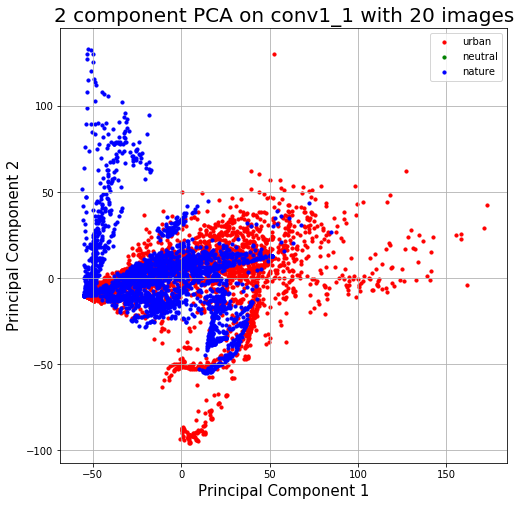

In [183]:
# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA on conv1_1 with 20 images', fontsize = 20)

classes = CLASSES[:]
colors = ['r', 'g', 'b']

for cls, color in zip(classes, colors):
    inds = merge_df['class'] == cls
    to_keep = merge_df.loc[inds, 'principle component 1']
    ax.scatter(merge_df.loc[inds, 'principle component 1'], merge_df.loc[inds, 'principle component 2'], \
            c = color, s = 10)
ax.legend(classes)
ax.grid()

In [178]:
# check variance ratio
pca.explained_variance_ratio_

array([0.31146847, 0.14955272])

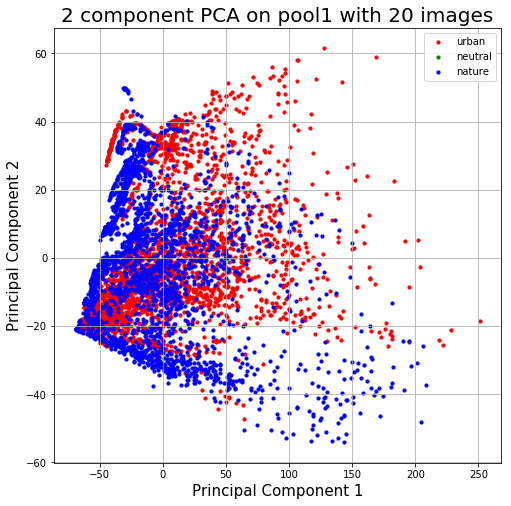

In [194]:
# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA on pool1 with 20 images', fontsize = 20)

classes = CLASSES[:]
colors = ['r', 'g', 'b']

for cls, color in zip(classes, colors):
    inds = merge_df['class'] == cls
    to_keep = merge_df.loc[inds, 'principle component 1']
    ax.scatter(merge_df.loc[inds, 'principle component 1'], merge_df.loc[inds, 'principle component 2'], \
            c = color, s = 10)
ax.legend(classes)
ax.grid()

In [195]:
# check variance ratio
pca.explained_variance_ratio_

array([0.54805367, 0.10944992])

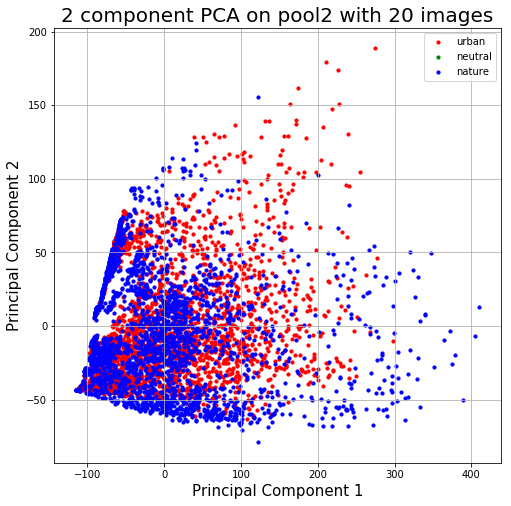

In [204]:
# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA on pool2 with 20 images', fontsize = 20)

classes = CLASSES[:]
colors = ['r', 'g', 'b']

for cls, color in zip(classes, colors):
    inds = merge_df['class'] == cls
    to_keep = merge_df.loc[inds, 'principle component 1']
    ax.scatter(merge_df.loc[inds, 'principle component 1'], merge_df.loc[inds, 'principle component 2'], \
            c = color, s = 10)
ax.legend(classes)
ax.grid()

In [205]:
# check variance ratio
pca.explained_variance_ratio_

array([0.4282739 , 0.10036235])

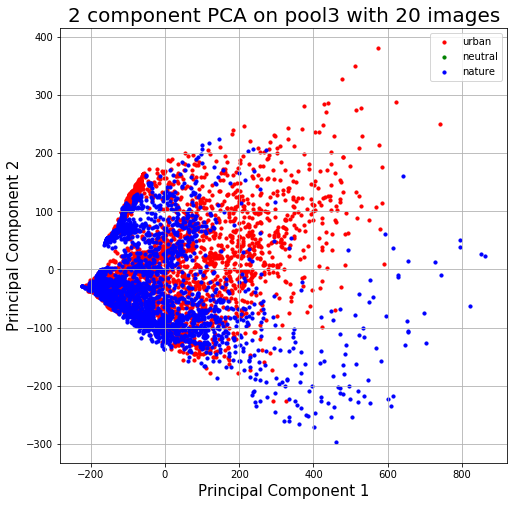

In [214]:
# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA on pool3 with 20 images', fontsize = 20)

classes = CLASSES[:]
colors = ['r', 'g', 'b']

for cls, color in zip(classes, colors):
    inds = merge_df['class'] == cls
    to_keep = merge_df.loc[inds, 'principle component 1']
    ax.scatter(merge_df.loc[inds, 'principle component 1'], merge_df.loc[inds, 'principle component 2'], \
            c = color, s = 10)
ax.legend(classes)
ax.grid()

In [215]:
# check variance ratio
pca.explained_variance_ratio_

array([0.36866808, 0.11255831])

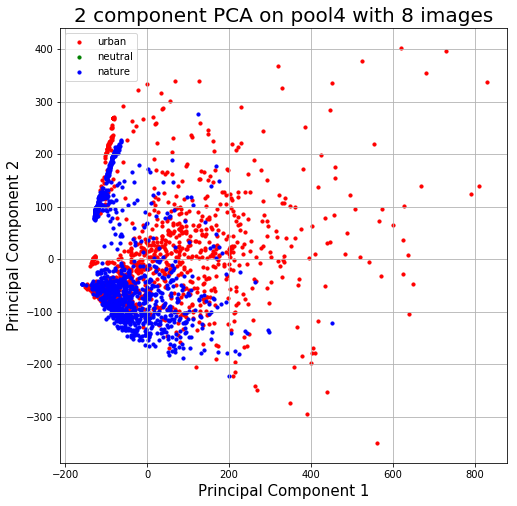

In [13]:
# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA on pool4 with 8 images', fontsize = 20)

classes = CLASSES[:]
colors = ['r', 'g', 'b']

for cls, color in zip(classes, colors):
    inds = merge_df['class'] == cls
    to_keep = merge_df.loc[inds, 'principle component 1']
    ax.scatter(merge_df.loc[inds, 'principle component 1'], merge_df.loc[inds, 'principle component 2'], \
            c = color, s = 10)
ax.legend(classes)
ax.grid()

In [14]:
# check variance ratio
pca.explained_variance_ratio_

array([0.0697191, 0.0463415])

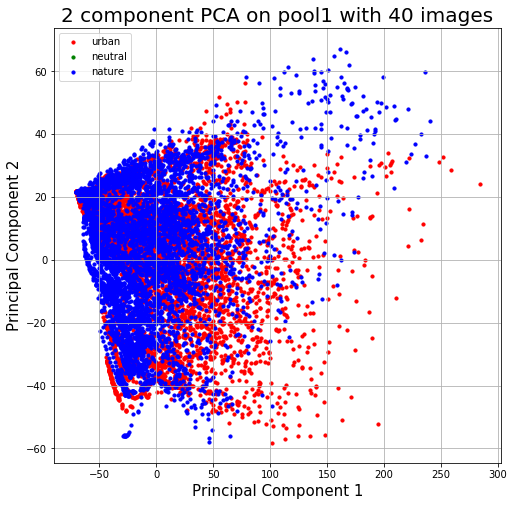

In [23]:
# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA on pool1 with 40 images', fontsize = 20)

classes = CLASSES[:]
colors = ['r', 'g', 'b']

for cls, color in zip(classes, colors):
    inds = merge_df['class'] == cls
    to_keep = merge_df.loc[inds, 'principle component 1']
    ax.scatter(merge_df.loc[inds, 'principle component 1'], merge_df.loc[inds, 'principle component 2'], \
            c = color, s = 10)
ax.legend(classes)
ax.grid()

In [24]:
# check variance ratio
pca.explained_variance_ratio_

array([0.53621315, 0.11401382])